In [ ]:
#%%

### ch4. 时间序列分析（单支股票）
#################################
# 4.1 概述
# 4.2 常见分析变量
# 4.3 移动窗口分析
# 4.4 高频数据分析

In [ ]:
#%%

# 导入需要的包
# pip install panda numpy matplotlib scipy  #安装数据处理基本包
import datetime, math #导入时间和数学包（python默认已经安装）
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
#%% 

### 4.1 概述
############
'''

金融数据时间序列分析
使用股票（期货，期权）的时间序列数据，可以构建如Diff, Log_Rets, 42d, 252d, Mov_Vol等用于分析的变量。
有两大类，一类是简单分析（包括Diff, Signal, CloseOpen, OpenClose, HighLow, Log_Rets,等），一类是基于移动窗口的分析（包括42d, 252d, Mov_Vol等）。
可以绘制适当的图形来可视化数据可辅助分析

常用的有如下2类5组9个变量，具体计算公式和相关知识点如下：
1. 买入和卖出信号(Diff, Signal)
    data['Diff'] = data['Close'].diff()                 # 收盘价的差分, 即当前行数据减去上一行数据
    data['Signal'] = np.where(data['diff'] > 0, 1, 0)   # 当diff大于0时, 信号为1, 否则为0
2. 价差(CloseOpen, OpenClose, HighLow)
    data['CloseOpen'] = data['Close']-data['Open']  # 收盘价与开盘价的差值
    data['OpenClose'] = data['Open']-data['Close']  # 开盘价与收盘价的差值
    data['HighLow'] = data['High']-data['Low']      # 最高价与最低价的差值
3. 收益率与对数收益率(returns, Log_Rets) 
    收盘价的收益率与对数收益率, shift(1)是向下移动一行, 即当前行数据减去上一行数据
    data['returns'] = data['Close'].pct_change()
    data['Log_Rets'] = np.log(data['Close']/data['Close'].shift(1)) 
4. 移动平均(42d, 252d), 移动平滑法
    与移动平均有关的函数应用; rolling(windows=42).mean() ,min(),max(),corr(),std(), 42天和252天的移动平均线, 是收盘价的平均值, 表示短期和长期的趋势
    data['42d']= data['Close'].rolling(42).mean()
    data['252d'] = data['Close'].rolling(252).mean()
5. 移动历史波动率 (Mov_Vol: moving annual volatility)
    moving annual volatility, 是收盘价的对数收益率的年化标准差, 即对数收益率的标准差乘以252的平方根
    data['Mov_Vol'] = (data['Log_Rets'].rolling(252).std())*math.sqrt(252)

高频数据分析 High Frequency Data (BID是买入价, ASK是卖出价)
1. 均值 eur_usd['Mid'] = eur_usd.mean(axis=1)
2. 重新采样 eur_usd_resam = eur_usd.resample(rule='10min').last()  #重新采样，.last()可替换成 .mean()

'''
print("准备好了")

准备好了


In [ ]:
#%%

### 4.2 常见分析变量
#################################
import math, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# 金融数据时间序列分析(（包括Diff, Signal, CloseOpen, OpenClose, HighLow, Log_Rets,等）)

# 读取csv文件
data = pd.read_csv("./data/stockdata_BABA.csv", encoding = "gbk") #从csv读取数据
data.columns = ['Date','Close','High','Low','Open','Volume']
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

print(data.head())

                Close       High        Low       Open     Volume
Date                                                             
2014-09-19  89.166862  94.684588  85.425062  88.036723  271879400
2014-09-22  85.368088  88.274152  84.997707  88.036729   66657800
2014-09-23  82.784912  85.928408  82.262584  84.465876   39009800
2014-09-24  86.013870  86.013870  82.832394  84.019512   32088000
2014-09-25  84.446884  86.897099  84.048014  86.507721   28598000


                 Close        High         Low        Open    Volume
Date                                                                
2025-10-17  167.050003  169.100006  161.149994  161.759995  17765700
2025-10-20  173.470001  174.970001  165.789993  167.289993  20120500
2025-10-21  166.669998  170.940002  166.419998  170.520004  15662500
2025-10-22  165.860001  169.669998  163.580002  167.000000  15016500
2025-10-23  171.899994  173.240005  168.317001  168.970001  12792100
2025-10-24  174.699997  176.440002  173.362000  174.399994  11841000
2025-10-27  179.449997  180.000000  177.619995  179.740005  12580800
2025-10-28  176.720001  179.380005  175.240005  177.479996  11906900
2025-10-29  179.970001  182.500000  178.089996  180.294998  12068900
2025-10-30  173.929993  176.380005  173.779999  174.320007  10756300
2025-10-31  170.429993  171.449997  168.119995  170.529999  13181400
2025-11-03  167.690002  168.940002  165.580002  168.309998   9702300
2025-11-04  164.300003  166.500000

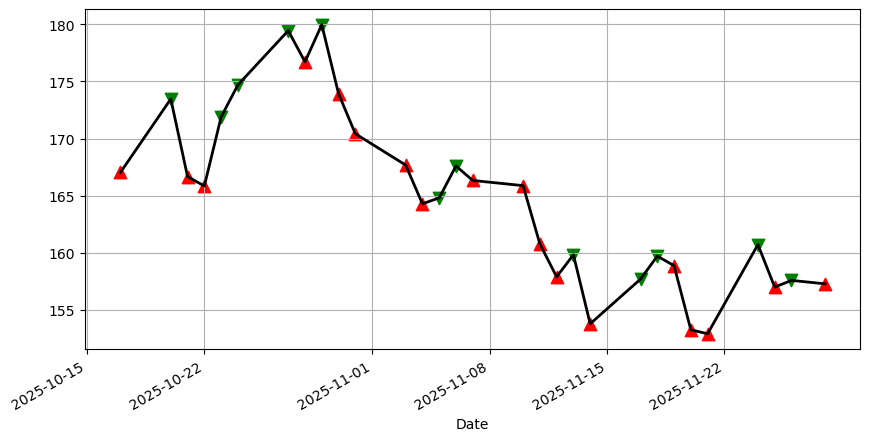

In [ ]:
#%%

# 增加买入和卖出信号(Diff, Signal)

# 取最新的30天的数据做分析
data3 = data.copy()[-30:]
print(data3)

## 计算交易信号Signal数据
#用.diff()方法来计算每日股价变化情况
data3['Diff'] = data3['Close'].diff()
#创建交易信号字段，命名为Signal
#简单交易策略
#·当日股价下跌，下一个交易日买入
#·当日股价上涨，下一个交易日卖出
#交易信号字段：Signal, diff > 0 Signal=1 卖出，否则Signal=0
data3['Signal'] = np.where(data3['Diff'] > 0, 1, 0)

# 绘制收盘价折线图和交易信号标志
plt.figure(figsize=(10, 5))
# 折线图绘制日K线
data3['Close'].plot(linewidth=2, color='k', grid=True)
# 卖出标志 x轴日期，y轴数值 卖出信号，倒三角
# matplotlib.pyplot.scatter(x, y, marker, size, color)
plt.scatter(data3['Close'].loc[data3.Signal == 1].index,
        data3['Close'][data3.Signal == 1],
        marker = 'v', s=80, c='g')
# 买入标志 正三角
plt.scatter(data3['Close'].loc[data3.Signal == 0].index,
        data3['Close'][data3.Signal == 0],
        marker='^', s=80, c='r')
plt.show()

                Close       High        Low       Open     Volume
Date                                                             
2014-09-19  89.166862  94.684588  85.425062  88.036723  271879400
2014-09-22  85.368088  88.274152  84.997707  88.036729   66657800
2014-09-23  82.784912  85.928408  82.262584  84.465876   39009800
2014-09-24  86.013870  86.013870  82.832394  84.019512   32088000
2014-09-25  84.446884  86.897099  84.048014  86.507721   28598000
                Close  CloseOpen  OpenClose   HighLow   returns  Log_Rets
Date                                                                     
2014-09-19  89.166862   1.130139  -1.130139  9.259526       NaN       NaN
2014-09-22  85.368088  -2.668641   2.668641  3.276445 -0.042603 -0.043537
2014-09-23  82.784912  -1.680964   1.680964  3.665823 -0.030259 -0.030727
2014-09-24  86.013870   1.994358  -1.994358  3.181477  0.039004  0.038263
2014-09-25  84.446884  -2.060837   2.060837  2.849085 -0.018218 -0.018386


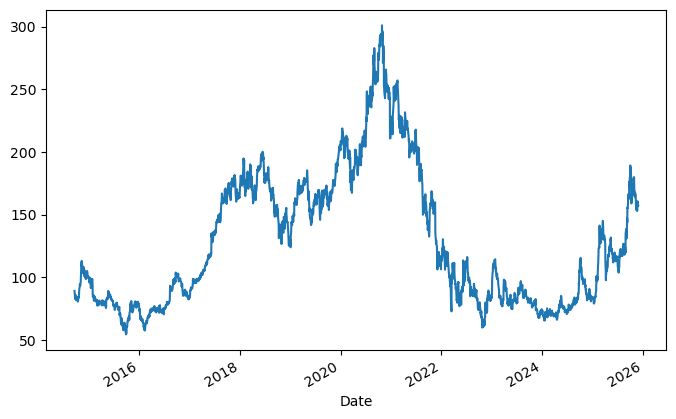

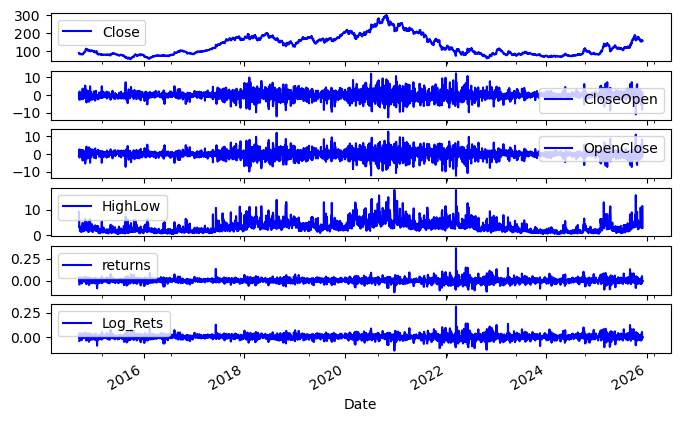

In [ ]:
#%%

# 计算价差 (CloseOpen, OpenClose, HighLow) 和收盘价的对数收益率(Log_Rets); 
# shift(1)是向下移动一行, 即当前行数据减去上一行数据

data1 = data.copy() # 以下使用全量数据
print(data1.head())

data1['Close'].plot(figsize=(8,5))

data1['Diff'] = data1['Close'].diff()
data1['CloseOpen'] = data1['Close']-data1['Open']
data1['OpenClose'] = data1['Open']-data1['Close']
data1['HighLow'] = data1['High']-data1['Low']
data1['returns'] = data1['Close'].pct_change()
data1['Log_Rets']=np.log(data1['Close']/data1['Close'].shift(1))
print(data1[['Close', 'CloseOpen', 'OpenClose', 'HighLow', 'returns', 'Log_Rets']].head())

data1[['Close','CloseOpen','OpenClose','HighLow','returns','Log_Rets']].plot(subplots=True, style='b',figsize=(8,5))
plt.show()

In [ ]:
#%%

### 4.3 移动窗口分析
######################

# 移动窗口的概念和移动平滑法是一种常见的时间序列分析方法。
# 与移动平均有关的函数应用，rolling(windows=42).mean(),min(),max(),corr(),std()

                 Close         42d        252d
Date                                          
2025-11-21  152.929993  169.544523  123.872183
2025-11-24  160.729996  169.193570  124.171398
2025-11-25  157.009995  168.838808  124.460495
2025-11-26  157.600006  168.307856  124.761494
2025-11-28  157.300003  167.797618  125.051742


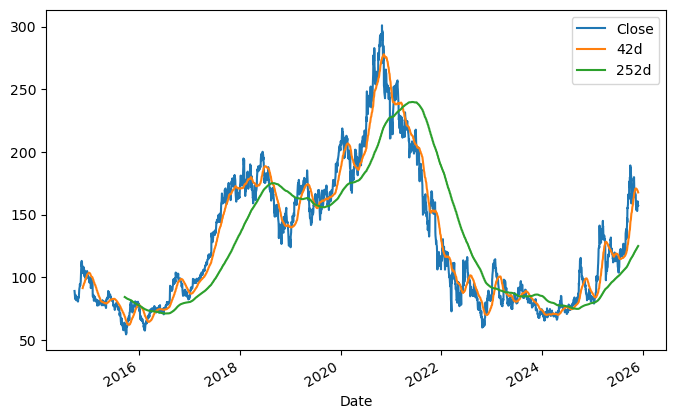

In [ ]:
#%%

# 计算42d, 252d 移动平均

# data1['42d'] = pd.rolling_mean(data1['Close'],windows=42) #出错，需要用下面这句
data1['42d']= data1['Close'].rolling(42).mean()
data1['252d'] = data1['Close'].rolling(252).mean()
print(data1[['Close','42d','252d']].tail())

data1[['Close','42d','252d']].plot(figsize=(8,5))
plt.show()

                 Close  Log_Rets   Mov_Vol
Date                                      
2025-11-21  152.929993 -0.002286  0.486047
2025-11-24  160.729996  0.049746  0.488315
2025-11-25  157.009995 -0.023416  0.488732
2025-11-26  157.600006  0.003751  0.487708
2025-11-28  157.300003 -0.001905  0.487005


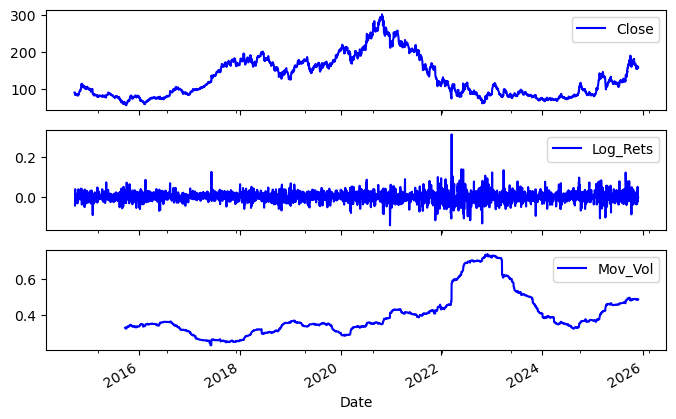

In [ ]:
#%%

# 计算移动历史波动率(Mov_Vol: moving annual volatility) 

data1['Mov_Vol'] = (data1['Log_Rets'].rolling(252).std())*math.sqrt(252)
print(data1[['Close','Log_Rets','Mov_Vol']].tail())
data1[['Close','Log_Rets','Mov_Vol']].plot(subplots=True, style='b',figsize=(8,5))
plt.show()

In [ ]:
#%%

# 将前述计算结果保存到csv
outputfile = './data/stockdata_BABA_TSA.csv'
data1.to_csv(outputfile)

In [ ]:
#%% 

# mplfinance高级绘图
import mplfinance as mpf

data2 = data1.copy()[-20:]
print(data2)

                 Close        High         Low        Open    Volume  \
Date                                                                   
2025-10-31  170.429993  171.449997  168.119995  170.529999  13181400   
2025-11-03  167.690002  168.940002  165.580002  168.309998   9702300   
2025-11-04  164.300003  166.500000  162.199997  162.600006   9693100   
2025-11-05  164.820007  166.880005  163.600006  164.399994   8631400   
2025-11-06  167.610001  170.550003  165.520004  169.000000  12438900   
2025-11-07  166.339996  166.380005  161.216003  162.960007  11581200   
2025-11-10  165.889999  168.000000  163.639999  167.619995   9348700   
2025-11-11  160.800003  165.580002  160.160004  164.589996  11354400   
2025-11-12  157.910004  161.190002  156.199997  160.979996  13920800   
2025-11-13  159.839996  164.000000  158.500000  164.000000  17213000   
2025-11-14  153.800003  162.619995  151.779999  156.940002  33991000   
2025-11-17  157.710007  161.024994  156.899994  157.979996  1691

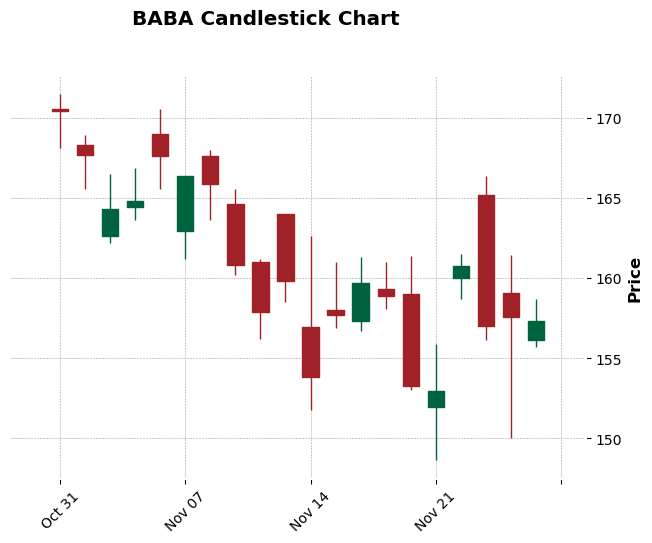

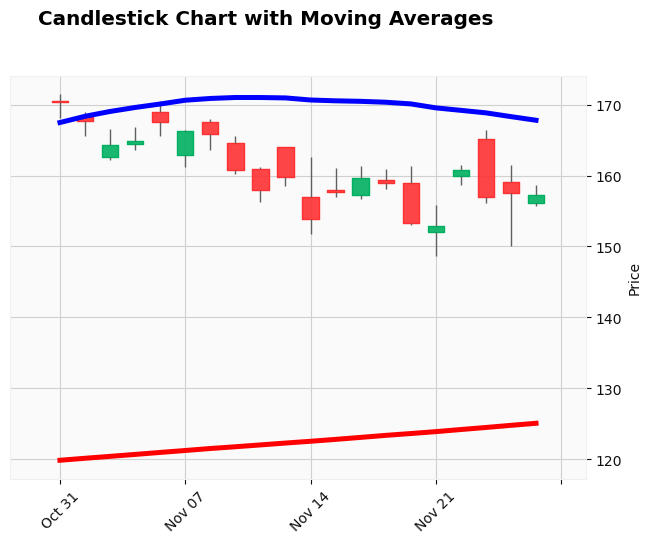

In [ ]:
#%%

# 绘制蜡烛图
# type='candle', type='line', type='renko', or type='pnf'
mpf.plot(data2, type='candle', style='charles', title='BABA Candlestick Chart', ylabel='Price')
# plt.show()
# 添加技术指标（移动平均线）
add_plot = [
    mpf.make_addplot(data2['42d'], color='b'),
    mpf.make_addplot(data2['252d'], color='r')]
mpf.plot(data2, type='candle', style='yahoo', title='Candlestick Chart with Moving Averages', ylabel='Price', addplot=add_plot)
#plt.show()
#plt.savefig('./data/candlestick_chart.png')

您输入的股票代码为: 002594.SZ
未输入起始时间, 默认使用19900101
未输入结束时间, 默认使用当前时间: 20251201
系统识别到股票代码为 002594.SZ 的股票名称为: 比亚迪
股票代码为 002594.SZ 比亚迪 的
从 19900101 到 20251201 的
日线数据共 3492 条
已经存在于./data/stock_002594.SZ_19900101_20251201.csv文件中,
正在读入到内存中...
股票代码为 002594.SZ 比亚迪 的
从 19900101 到 20251201 的日线数据已经预处理完成, 
其最后三行示例如下:
            Close   Open
Date                    
2025-11-27  94.29  94.60
2025-11-28  95.17  94.60
2025-12-01  95.77  95.39

股票代码为 002594.SZ 比亚迪 的股票的42D与252D移动平均数据:

            Close         42d        252d
Date                                     
2025-11-25  93.91  102.204762  259.405873
2025-11-26  95.09  101.871429  258.590476
2025-11-27  94.29  101.545238  257.795000
2025-11-28  95.17  101.296905  257.021865
2025-12-01  95.77  101.060238  256.256349


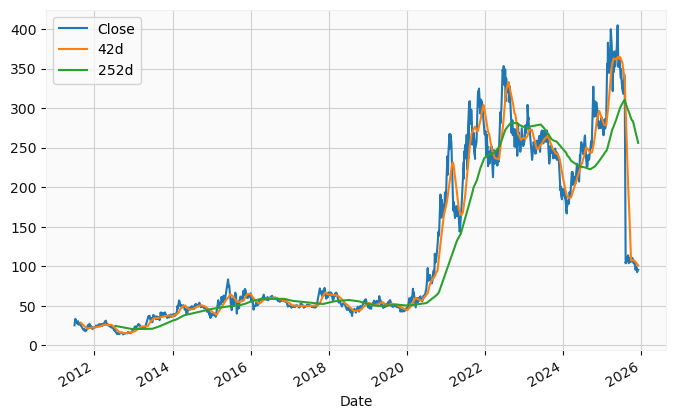


股票代码为 002594.SZ 比亚迪 的股票的对数收益率, 移动历史波动率等数据:

            Close  CloseOpen  Log_Rets   Mov_Vol
Date                                            
2025-11-25  93.91      -0.09 -0.000213  1.155445
2025-11-26  95.09       0.34  0.012487  1.155565
2025-11-27  94.29      -0.31 -0.008449  1.155474
2025-11-28  95.17       0.57  0.009290  1.155496
2025-12-01  95.77       0.38  0.006285  1.155546


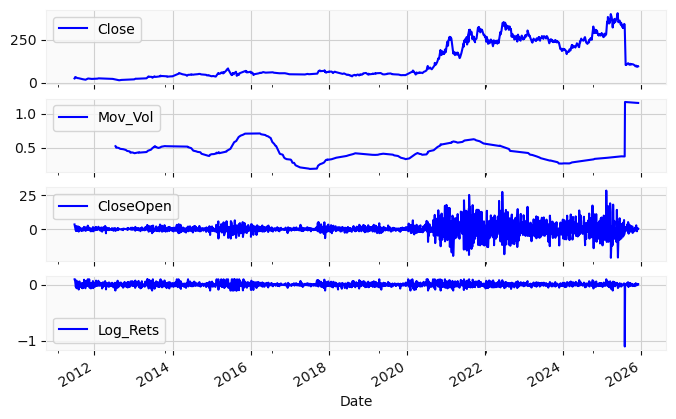


股票代码为 002594.SZ 比亚迪 的时间序列分析相关结果已保存到
./data/stock_002594.SZ_19900101_20251201_result.csv文件中.
             Close         Open          42d         252d     Log_Rets  \
count  3492.000000  3492.000000  3451.000000  3241.000000  3491.000000   
mean    118.701137   118.628325   119.350384   118.739217     0.000380   
std     104.281035   104.261516   103.567936    98.301486     0.034044   
min      13.990000    13.930000    15.268095    19.959127    -1.106776   
25%      46.815000    46.875000    47.026429    50.221786    -0.014210   
50%      57.920000    57.865000    57.952381    56.806627    -0.000157   
75%     230.242500   230.057500   230.133929   231.683056     0.013436   
max     405.000000   401.810000   365.258333   310.591587     0.095509   

         CloseOpen      Mov_Vol  
count  3492.000000  3240.000000  
mean      0.072812     0.455374  
std       3.578006     0.166165  
min     -21.010000     0.189014  
25%      -0.960000     0.355316  
50%      -0.030000     0.421771  
75

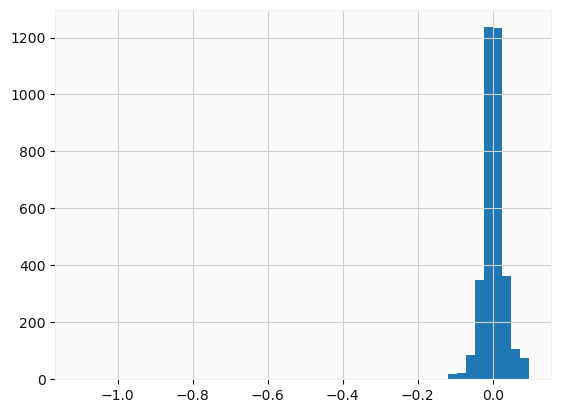


股票代码为 002594.SZ 比亚迪 的对数收益率的统计量:

     statistic           value
------------------------------
          size      3491.00000
           min        -1.10678
           max         0.09551
          mean         0.00038
           std         0.03404
          skew        -9.70599
      kurtosis       320.16454

股票代码为 002594.SZ 比亚迪 的对数收益率的QQ图:


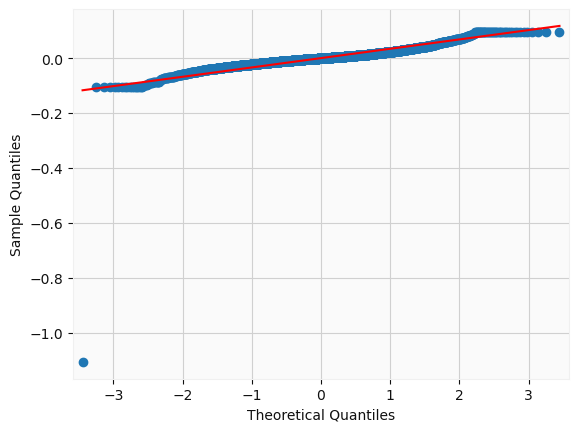


股票代码为 002594.SZ 比亚迪 的对数收益率的偏度、峰度、正态性检验:

Skew of data set          -9.706
Skew test p-value          0.000
Kurt of data set         320.165
Kurt test p-value          0.000
Norm test p-value          0.000

股票代码为 002594.SZ 比亚迪 的历史数据分析全部完成.
./data/stock_002594.SZ_19900101_20251201_result.csv


In [ ]:
#%%

# 综合分析

from functions_tsa import tsa
file_ = tsa(stock_code='002594.SZ')
print(file_)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461357 entries, 2018-06-29 00:00:00.082000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Bid     461357 non-null  float64
 1   Ask     461357 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


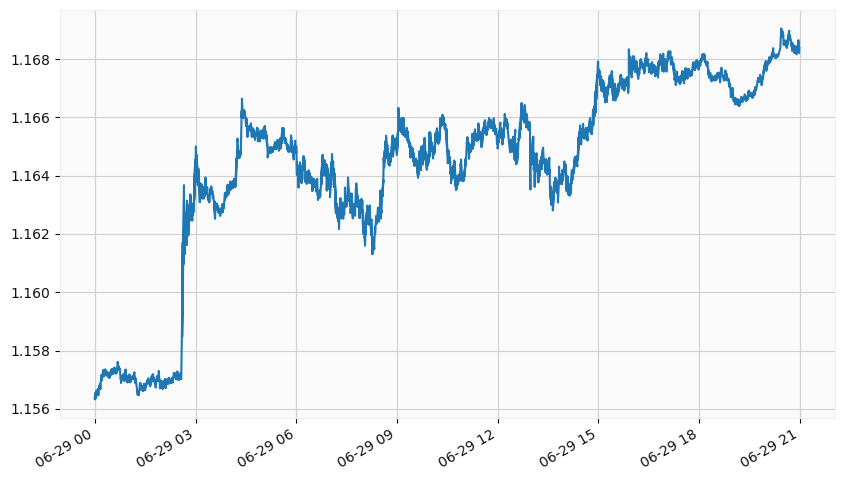

                      Bid   Ask   Mid
2018-06-29 00:00:00  1.16  1.16  1.16
2018-06-29 00:10:00  1.16  1.16  1.16
2018-06-29 00:20:00  1.16  1.16  1.16
2018-06-29 00:30:00  1.16  1.16  1.16
2018-06-29 00:40:00  1.16  1.16  1.16


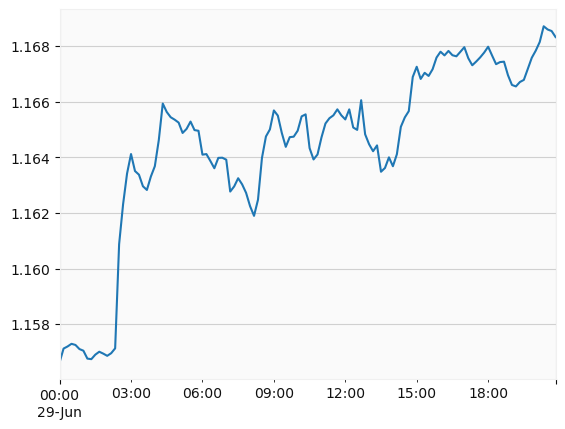

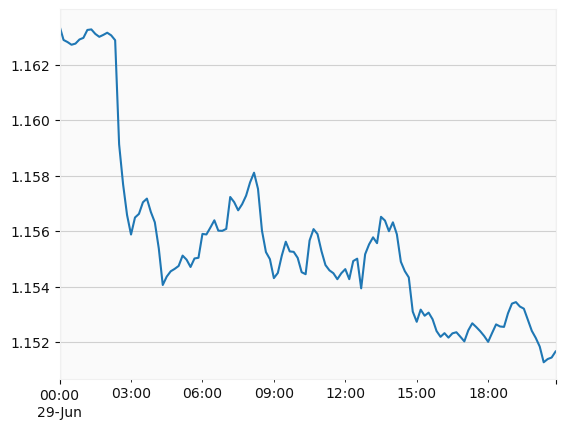

In [ ]:
#%%

# 4.4 高频数据分析（股票）
########################

# High Frequency Data
# data from FXCM Forex Capital Markets Ltd.
#data = pd.read_csv('http://hilpisch.com/fxcm_eur_usd_tick_data.csv',index_col=0, parse_dates=True)
eur_usd = pd.read_csv('./data/fxcm_eur_usd_tick_data.csv',index_col=0, parse_dates=True)
eur_usd.info()

eur_usd['Mid'] = eur_usd.mean(axis=1)
eur_usd['Mid'].plot(figsize=(10, 6))
plt.show()

#eur_usd_resam = eur_usd.resample(rule='1min', label='last').last()  #重新采样
#eur_usd_resam = eur_usd.resample(rule='10min').last()  #重新采样
#eur_usd_resam = eur_usd.resample(rule='5min',how='mean')
eur_usd_resam = eur_usd.resample(rule='10min').mean()
print(np.round(eur_usd_resam.head(),2))
eur_usd_resam['Mid'].plot(grid=True)
plt.show()

def reversal(x):
    return 2 * 1.16 - x

eur_usd_resam['Mid'].apply(reversal).plot()    
plt.show()

In [ ]:
#%%

#############END################"